### Package Imports and Settings

In [46]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tikzplotlib
import math

#Set display options
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)

#random.seed(1)
#np.random.seed(1)

### Import Data

In [47]:
data = pd.read_csv('../data/grad_school.csv', decimal=",", delimiter = ';')
data = data.apply(pd.to_numeric)

### Data Preprocessing

In [48]:
data = data.drop(['Admit','Help_1','Help_2','Help_3','Help_4','Help_5','Help_6'], axis = 1)
data.head()

#data = data.sample(frac=1).reset_index(drop=True)

,ID,Gender_F,Gender_M,Race_B,Race_A,Race_W,GRE_Verbal,GRE_Quant
0,1,1,0,1,0,0,149,165
1,2,1,0,0,1,0,164,159
2,3,1,0,0,0,1,140,153
3,4,0,1,1,0,0,149,156
4,5,0,1,0,1,0,153,154


### Define Legitimate Features

In [49]:
data_cluster = data.drop(['ID','Gender_M','Gender_F','Race_W','Race_B','Race_A'], axis = 1)
data_cluster.head()

,GRE_Verbal,GRE_Quant
0,149,165
1,164,159
2,140,153
3,149,156
4,153,154


### Standardize Data

In [50]:
#Standardize the data
#data_cluster['GRE_Verbal'] = ((data_cluster['GRE_Verbal']-data_cluster['GRE_Verbal'].mean())/data_cluster['GRE_Verbal'].std())
#data_cluster['GRE_Quant'] = ((data_cluster['GRE_Quant']-data_cluster['GRE_Quant'].mean())/data_cluster['GRE_Quant'].std())

### Transform to NumPy Array

In [51]:
data_cluster_array = data_cluster.to_numpy()

### Run k-means Clustering

In [52]:
init = np.array([[data_cluster['GRE_Verbal'].min(), data_cluster['GRE_Quant'].min()],[data_cluster['GRE_Verbal'].max(), data_cluster['GRE_Quant'].max()]],np.float64)
#init = np.array([[170, 130],[170, 130]],np.float64)
kmeans = KMeans(n_clusters=2, n_init=1, max_iter=100, init=init).fit(data_cluster_array)

data['Cluster'] = kmeans.labels_
print(data['Cluster'].value_counts())
#print(kmeans.inertia_)
#print(kmeans.cluster_centers_)

0    316
1    284
Name: Cluster, dtype: int64


### Scatter Plot of Labels

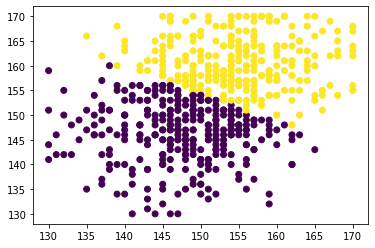

In [53]:
plt.scatter(data_cluster_array[:, 0], data_cluster_array[:, 1], c=data['Cluster'])

### Compare Positive Outcome Distribution of all Combinations of Sensitive Attributes (Group Fairness)

In [54]:
#Group fairness
print(len(data[(data.Gender_F == 1) & (data.Cluster == 1)]))
print(len(data[(data.Gender_M == 1) & (data.Cluster == 1)]))
print('---')
print(len(data[(data.Race_B == 1) & (data.Cluster == 1)]))
print(len(data[(data.Race_A == 1) & (data.Cluster == 1)]))
print(len(data[(data.Race_W == 1) & (data.Cluster == 1)]))
print('---')
print(len(data[(data.Gender_F == 1) & (data.Race_B == 1) & (data.Cluster == 1)]))
print(len(data[(data.Gender_F == 1) & (data.Race_A == 1) & (data.Cluster == 1)]))
print(len(data[(data.Gender_F == 1) & (data.Race_W == 1) & (data.Cluster == 1)]))
print('---')
print(len(data[(data.Gender_M == 1) & (data.Race_B == 1) & (data.Cluster == 1)]))
print(len(data[(data.Gender_M == 1) & (data.Race_A == 1) & (data.Cluster == 1)]))
print(len(data[(data.Gender_M == 1) & (data.Race_W == 1) & (data.Cluster == 1)]))

138
146
---
92
96
96
---
44
46
48
---
48
50
48
